In [39]:
%pip install import-ipynb

Note: you may need to restart the kernel to use updated packages.


In [40]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import re 
import import_ipynb
import seaborn as sns

In [41]:
dados = pd.read_csv('titles.csv')
# lê a base de dados


In [42]:

# Primeiro filtramos nossa base para avaliar somente os filmes:
filmes = dados.loc[dados.type=='MOVIE']
filmes.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800


In [43]:
#depois fizemos o describe da popularidade e seguindo das outras variáveis também
filmes['tmdb_popularity'].describe()
# A target escolhida para avaliar quais filmes apresentam maior satisfação dos usuários foi a popularidade
# de acordo com o tmdb.
# Esta varia de 0.009442 a 2274.044000, pode-se observar que 50% da popularidade dos filmes na Netflix está abaixo de 5,
# mas a média é 20, 
# logo a popularidade de alguns filmes difere muito da maioria e dificulta a análise dos dados, dispersando muito o eixo
# Para as variáveis quantitativas com valores que fogem muito da média pode ser feito a elimição dos valores
# extremos a partir dos cálculos de limite superior e inferior
# que são LS: Q3 + 1,5 IQ e LI: Q1 - 1,5 IQ, sendo IQ= Q3 - Q1

count    3682.000000
mean       20.314546
std        78.066405
min         0.009442
25%         2.509250
50%         5.862000
75%        14.657250
max      2274.044000
Name: tmdb_popularity, dtype: float64

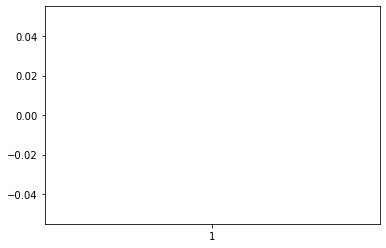

In [44]:

plt.boxplot(filmes['tmdb_popularity'])
plt.show()
# de tanto que os dados são dispersos, o gráfico boxplot nem aparece

In [8]:
# Retiramos os valores berrantes
Qter= filmes['tmdb_popularity'].quantile(0.75)
Qpri= filmes['tmdb_popularity'].quantile(0.25)
iq= Qter - Qpri
LS = Qter + 1.5*iq
LI= Qpri - 1.5*iq
filtro = filmes.loc[(filmes['tmdb_popularity']>LI)&(filmes['tmdb_popularity']<LS)]
filtro.dropna()
filtro.head(5)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,395024.0,17.770,7.800
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],NaN,tt0066999,7.7,155051.0,12.817,7.500


In [9]:
filtro = filtro.drop(columns=['seasons'])
filtro.head(2)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0,15.461,7.811


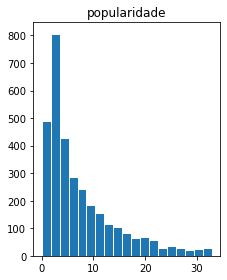

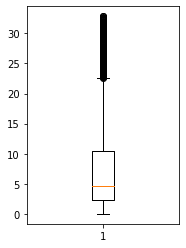

In [10]:
faixa_pop= np.linspace(filtro['tmdb_popularity'].min(), filtro['tmdb_popularity'].max(), 20)
plt.subplot(121) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 3
plt.hist(filtro['tmdb_popularity'], faixa_pop, edgecolor='white')
plt.title("popularidade")

plt.tight_layout()
plt.show()

plt.subplot(122)
plt.boxplot(filtro['tmdb_popularity'])
plt.show()

In [11]:
nota_imdb= filtro.imdb_score
nota_tmdb= filtro.tmdb_score
duracao= filtro.runtime
votos_imdb= filtro.imdb_votes
lancamento= filtro.release_year
popularidade= filtro.tmdb_popularity
# nomeando as outras variáveis e pegando apenas os valores dentro do filtro de valores berrantes de popularidade

In [12]:
# para analidar a frequêncidas dos dados, fizemos um histograma de cada uma das variáveis quantitativas
def hist(var): 
    faixa_var = np.linspace(var.min(), var.max(), 20)
    plt.hist(var,faixa_var , edgecolor='white', density=True)
    plt.title(var.name)

    return(plt.show())
faixa_votos= np.linspace(votos_imdb.min(), votos_imdb.max(), 30)
faixa_nota_imdb= np.linspace(nota_imdb.min(), nota_imdb.max(), 20)
faixa_nota_tmdb= np.linspace(nota_imdb.min(), nota_imdb.max(), 20)


In [13]:
#observando as variáveis quantitativas que temos pra analisar, foi feito um describe de cada uma, para entender como ela se comporta
nota_imdb.describe()

count    2972.000000
mean        6.262450
std         1.116871
min         1.500000
25%         5.600000
50%         6.400000
75%         7.100000
max         9.100000
Name: imdb_score, dtype: float64

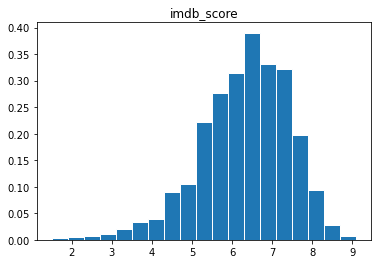

In [14]:
hist(nota_imdb)

In [15]:
nota_tmdb.describe()

count    3122.000000
mean        6.434910
std         1.065455
min         1.000000
25%         5.800000
50%         6.500000
75%         7.100000
max        10.000000
Name: tmdb_score, dtype: float64

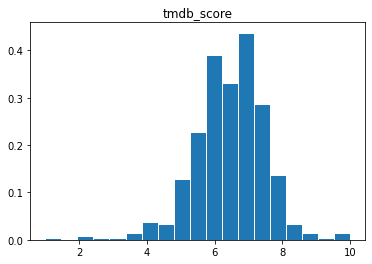

In [16]:
hist(nota_tmdb)

In [17]:
duracao.describe()

count    3254.000000
mean       97.758758
std        31.345156
min         2.000000
25%        84.000000
50%        98.000000
75%       115.000000
max       240.000000
Name: runtime, dtype: float64

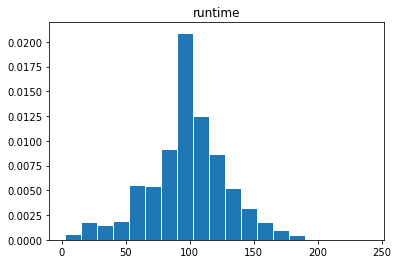

In [18]:
hist(duracao)

In [19]:
votos_imdb.describe() 
# o desvio padrão dos valores dos votos é muito alto,
# logo é importante retirar os valores absurdos para analisar seu histograma

count      2959.000000
mean      15442.719500
std       47325.908436
min           5.000000
25%         500.500000
50%        2199.000000
75%        8318.000000
max      841435.000000
Name: imdb_votes, dtype: float64

In [20]:
Qter_= votos_imdb.quantile(0.75)
Qpri_= votos_imdb.quantile(0.25)
iq_= Qter_ - Qpri_
LS_ = Qter_ + 1.5*iq_
LI_ = Qpri_ - 1.5*iq_
filtro_votos = filtro.loc[(votos_imdb>LI_)&(votos_imdb<LS_)]
votos_filtrado= filtro_votos.imdb_votes

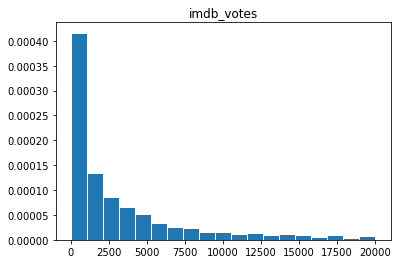

In [21]:
hist(votos_filtrado)

In [22]:
lancamento.describe()

count    3254.000000
mean     2015.676706
std         7.740367
min      1954.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: release_year, dtype: float64

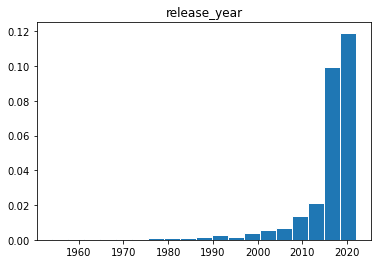

In [23]:
hist(lancamento)

<AxesSubplot:>

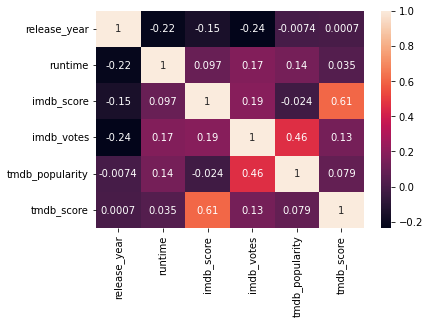

In [24]:
#Em seguida fizemos a correlação da popularidade com essas variáveis
# A correlação é um cálculo estatístico que torna possível a comparação de dois grupos de dados e,
# dessa forma, entender como eles se relacionam entre si
# Percebendo alguma covariância alta entre as variáveis é possível entender melhor o que influencia cada coisa
correlacao= filtro.corr()
sns.heatmap(correlacao,annot=True)


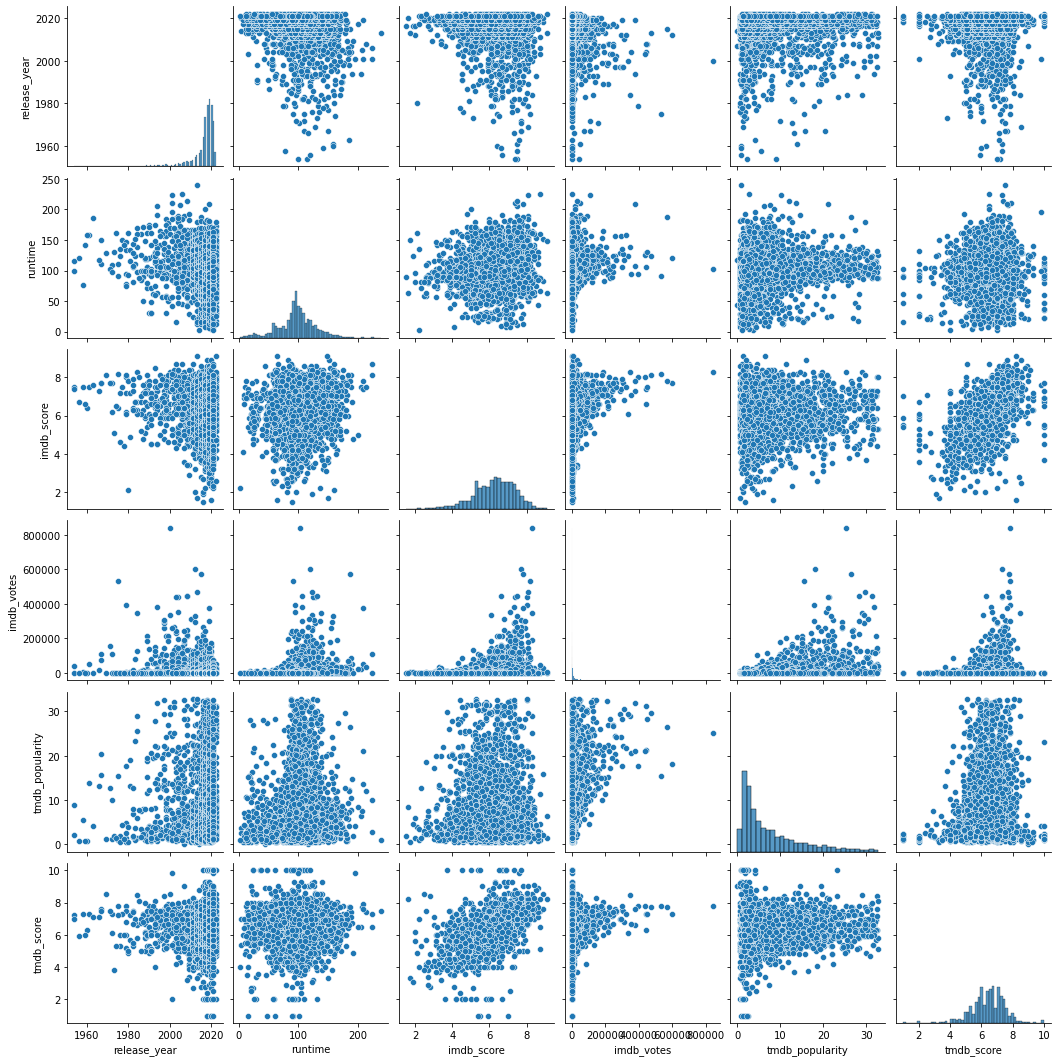

In [25]:
# Precisa ter um data frame (df)
sns.pairplot(filtro, hue = None)
plt.show() 

In [47]:
from funcoes import generos
#para ter mais variáveis em análise, já que a maioria dos dados não tem muita correlação entre si
#fizemos uma seleção dos gêneros que mais aparecem para criar uma nova coluna no dataframe que indica se o S
#filme é do respectivo gênero ou não e depois comparar a classificação do filme com a popularidade

In [48]:
dados_comedia = generos('comedy', filtro)
dados_romance = generos('romance', filtro)
dados_drama = generos('drama', filtro)
dados_acao = generos('action', filtro)
dados_fantasia = generos('fantasy', filtro)
dados_horror = generos('horror', filtro)
#
filtro.head(5)

<string>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
c:\Users\grupo\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,comedy,romance,drama,action,fantasy,horror
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],tt0068473,7.7,107673.0,10.010,7.300,0,0,1,1,0,0
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],tt0071853,8.2,534486.0,15.461,7.811,1,0,0,1,1,0
6,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],tt0079470,8.0,395024.0,17.770,7.800,1,0,0,0,0,0
7,tm14873,Dirty Harry,MOVIE,When a madman dubbed 'Scorpio' terrorizes San ...,1971,R,102,"['thriller', 'action', 'crime']",['US'],tt0066999,7.7,155051.0,12.817,7.500,0,0,0,1,0,0
8,tm119281,Bonnie and Clyde,MOVIE,"In the 1930s, bored waitress Bonnie Parker fal...",1967,R,110,"['crime', 'drama', 'action']",['US'],tt0061418,7.7,112048.0,15.687,7.500,0,0,1,1,0,0


In [49]:
g_nota_imdb= filtro.imdb_score
g_nota_tmdb= filtro.tmdb_score
g_duracao= filtro.runtime
g_votos_imdb= filtro.imdb_votes
g_lancamento= filtro.release_year
g_popularidade= filtro.tmdb_popularity

In [50]:

def hist(genero, v):
    colors = ['red', 'pink', 'green', 'purple', 'yellow', 'blue', 'orange', 'brown', 'grey']
    d0 = filtro.loc[filtro[genero]==0, v]
    d1 = filtro.loc[filtro[genero]==1, v]
    d0.hist(color=random.choice(colors), density=True, alpha=0.5, label='0')
    d1.hist(color=random.choice(colors), density=True, alpha=0.5, label='1')
    plt.title(genero)
    plt.xlabel('popularidade')
    plt.ylabel('densidade')
    plt.legend()
    return(plt.show())

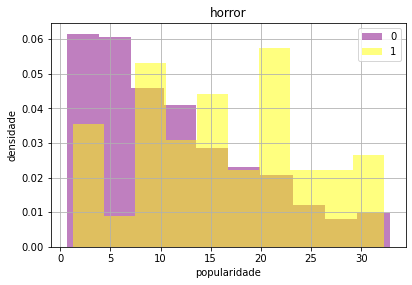

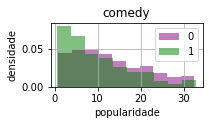

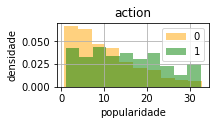

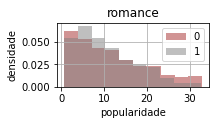

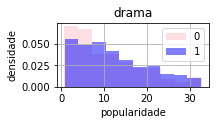

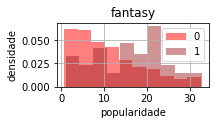

In [51]:
fig = plt.figure(figsize=(14, 14))

plt.subplot(321)
hist('horror', 'tmdb_popularity')

plt.subplot(322)
hist('comedy', 'tmdb_popularity')

plt.subplot(323)
hist('action', 'tmdb_popularity')

plt.subplot(324)
hist('romance', 'tmdb_popularity')

plt.subplot(325)
hist('drama', 'tmdb_popularity')

plt.subplot(326)
hist('fantasy', 'tmdb_popularity')

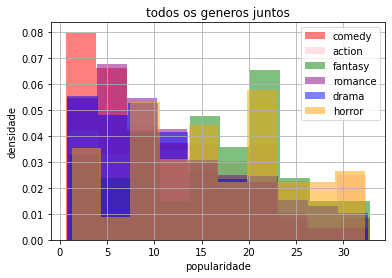

In [53]:
generos = ['comedy', 'action', 'fantasy', 'romance', 'drama', 'horror']
colors = ['red', 'pink', 'green', 'purple', 'blue', 'orange']
i=0
for genero in generos:
    d = filtro.loc[filtro[genero]==1, 'tmdb_popularity']
    d.hist(color=colors[i], density=True, alpha=0.5, label=genero)
    i+=1
plt.title("todos os generos juntos")    
plt.xlabel('popularidade')
plt.ylabel('densidade')
plt.legend()

In [97]:
from sklearn.model_selection import train_test_split
#Dividindo o dataset em 80% treain e 20% test
X = filtro[['runtime', 'imdb_score', 'imdb_votes', 'tmdb_score', 'release_year']]
y = filtro.tmdb_popularity
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=0)
#Desicion Tree regressor
#dt = DecisionTreeRegressor(max_depth=10, min_samples_leaf=0, random_state=1)
X_train.shape


(805, 5)

In [98]:
#filtro.isna().sum()
filtro = filtro.dropna()
filtro.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
comedy                  0
romance                 0
drama                   0
action                  0
fantasy                 0
horror                  0
dtype: int64

In [99]:
X_train = X_train.dropna()
X_train.isna().sum()
y_train = y_train.dropna()
y_train.isna().sum()
X_test =  X_test.dropna()
X_test.isna().sum()
y_test =  y_test.dropna()
y_test.isna().sum()

0

In [103]:
#Primeiramente fizemos regressão linear das features iniciais com popularidade
import statsmodels.api as sm
def regress(Y,X):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results
X = X_train[['runtime', 'imdb_score', 'imdb_votes', 'tmdb_score', 'release_year']]
Y = y_train
results = regress(Y,X)
results.summary()

c:\Users\grupo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tmdb_popularity   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     60.00
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           4.22e-53
Time:                        16:00:28   Log-Likelihood:                -2688.3
No. Observations:                 805   AIC:                             5389.
Df Residuals:                     799   BIC:                             5417.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -149.4501     64.512     -2.317      0.021    -276.083     -22.817
runtime         -0.0094      0.009     -1.054      0.292      -0.027       0.008
imdb_score      -1.5585      0.315     -4.946      0.000      -2.177      -0.940
imdb_votes    6.049e-05   3.65e-06     16.590      0.000    5.33e-05    6.76e-05
tmdb_score       1.2366      0.360      3.438      0.001       0.531       1.943
release_year     0.0802      0.032      2.511      0.012       0.018       0.143
==============================================================================
Omnibus:                       77.353   Durbin-Watson:                   2.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.190
Skew:                           0.732   Prob(JB):                     5.30e-24
Kurtosis:                       4.026   Cond. No.                     2.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
X = X_train[['imdb_score', 'imdb_votes', 'tmdb_score', 'release_year']]
Y = y_train
results = regress(Y,X)
results.summary()

c:\Users\grupo\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        tmdb_popularity   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     74.72
Date:                Fri, 02 Dec 2022   Prob (F-statistic):           7.93e-54
Time:                        16:00:49   Log-Likelihood:                -2688.9
No. Observations:                 805   AIC:                             5388.
Df Residuals:                     800   BIC:                             5411.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -158.8040     63.903     -2.485      0.013    -284.240     -33.368
imdb_score      -1.6168      0.310     -5.212      0.000      -2.226      -1.008
imdb_votes    6.008e-05   3.63e-06     16.572      0.000     5.3e-05    6.72e-05
tmdb_score       1.2519      0.359      3.483      0.001       0.546       1.957
release_year     0.0845      0.032      2.667      0.008       0.022       0.147
==============================================================================
Omnibus:                       77.177   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.421
Skew:                           0.739   Prob(JB):                     1.28e-23
Kurtosis:                       3.980   Cond. No.                     2.15e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

((array([-3.13451857e+00, -2.86438262e+00, -2.71330502e+00, -2.60658839e+00,
         -2.52322891e+00, -2.45440960e+00, -2.39556084e+00, -2.34399737e+00,
         -2.29800241e+00, -2.25640948e+00, -2.21838865e+00, -2.18332764e+00,
         -2.15076141e+00, -2.12032814e+00, -2.09174058e+00, -2.06476676e+00,
         -2.03921654e+00, -2.01493207e+00, -1.99178081e+00, -1.96965033e+00,
         -1.94844446e+00, -1.92808020e+00, -1.90848549e+00, -1.88959727e+00,
         -1.87136007e+00, -1.85372485e+00, -1.83664797e+00, -1.82009048e+00,
         -1.80401744e+00, -1.78839738e+00, -1.77320185e+00, -1.75840507e+00,
         -1.74398355e+00, -1.72991589e+00, -1.71618247e+00, -1.70276532e+00,
         -1.68964787e+00, -1.67681488e+00, -1.66425223e+00, -1.65194688e+00,
         -1.63988670e+00, -1.62806043e+00, -1.61645758e+00, -1.60506835e+00,
         -1.59388359e+00, -1.58289475e+00, -1.57209379e+00, -1.56147317e+00,
         -1.55102583e+00, -1.54074508e+00, -1.53062465e+00, -1.52065860e+00,

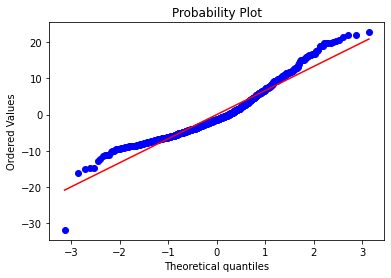

In [105]:
from scipy.stats import norm,probplot

probplot(results.resid, dist='norm', plot=plt)

In [113]:
from sklearn import preprocessing
from sklearn import utils

#convert y values to categorical values
lab = preprocessing.LabelEncoder()
y_train = lab.fit_transform(y_train)
y_test = lab.fit_transform(y_test)


In [114]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(max_depth=10, random_state=1)
clf2.fit(X_train, y_train)
clf2.score(X_test, y_test)


0.0

In [115]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.0049504950495049506